# **A Dungeon Master's Guide to Clustering** (Reference)
This hands-on workshop sits at the intersection of classic machine learning techniques and Dungeons & Dragons, the classic tabletop roleplaying game that's celebrated by generations.  

You will be guided through the elegant and powerful **K-means clustering algorithm** as you cluster fantasy monsters by their in-game attributes.

### Import Libraries
These libraries will have been installed on your local machine with the requirements.txt file provided in the workshop directory. If you have not yet done so, please run the following command from the workshop directory: `pip3 install -r requirements.txt`  

With these tools, you will be able to perform valuable matrix operations, read in comma-delimited data files (.CSVs), and create interactive, 3D visualizations.

In [2]:
%matplotlib notebook 

import numpy as np              #for arrays and matrices
import matplotlib.pyplot as plt #for plots and graphs (here, backend for Seaborn)
import pandas as pd             #for reading .CSV files and creating data tables (dataframes)
import seaborn as sns           #for elegant plotting utilities

from mpl_toolkits.mplot3d import Axes3D #for interactive, 3D graphs

sns.set(style = "darkgrid")     #cosmetic

### Import Dataset
Here, you will import the data file **monsters.csv** which contains information about many of the monsters that might appear in Dungeons & Dragons. Although this file includes everything from the monsters' names to their native environments, we will only use some of the information in our analysis.  

In this step, we will read in the information from the CSV file and put it in a Pandas dataframe. A dataframe is a useful utility for storing information in easily-accessible tables. After creating the dataframe, take a look at what you've built!

In [3]:
DF_monsters = pd.read_csv('monsters.csv')  #read in CSV file to Pandas dataframe

DF_monsters.head()  #preview your new Pandas dataframe

,Unnamed: 0,_id,index,name,size,type,subtype,alignment,armor_class,hit_points,...,condition_immunities,senses,languages,challenge_rating,special_abilities,actions,legendary_actions,url,reactions,other_speeds
0,0,5f2329ad0b1bb138c59411ee,aboleth,Aboleth,Large,aberration,NaN,lawful evil,17,135,...,[],"{'darkvision': '120 ft.', 'passive_perception'...","Deep Speech, telepathy 120 ft.",10.00,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'name': 'Multiattack', 'desc': 'The aboleth ...","[{'name': 'Detect', 'desc': 'The aboleth makes...",/api/monsters/aboleth,NaN,NaN
1,1,5f2329ad0b1bb138c59411ef,acolyte,Acolyte,Medium,humanoid,any race,any alignment,10,9,...,[],{'passive_perception': 12},any one language (usually Common),0.25,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",NaN,/api/monsters/acolyte,NaN,NaN
2,2,5f2329ad0b1bb138c59411f1,adult-black-dragon,Adult Black Dragon,Huge,dragon,NaN,chaotic evil,19,195,...,[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",14.00,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/monsters/adult-black-dragon,NaN,NaN
3,3,5f2329ad0b1bb138c59411f0,adult-blue-dragon,Adult Blue Dragon,Huge,dragon,NaN,lawful evil,19,225,...,[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",16.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/monsters/adult-blue-dragon,NaN,NaN
4,4,5f2329ad0b1bb138c59411f2,adult-brass-dragon,Adult Brass Dragon,Huge,dragon,NaN,chaotic good,18,172,...,[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",13.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...",NaN,/api/monsters/adult-brass-dragon,NaN,NaN


### Dataset Visualization  
Now that the monsters have been loaded into a clean Pandas dataframe, let's visualize some of the relationships between some of the most relevant pieces of monster information. To do this, we'll call on Matplotlib for plotting utilities.  

Let's create a 3D plot with which we can interact. Because Pandas dataframes are designed for accessibility, we can dial up information on any monster attribute by column name! To set the values for each axis in our plot, we can choose some numerical parameters that describe monsters.  

You can try visualizing loads of different combinations, but for now, let's take a look at **Hit Points**, **Armor Class**, and **Strength**.

<IPython.core.display.Javascript object>


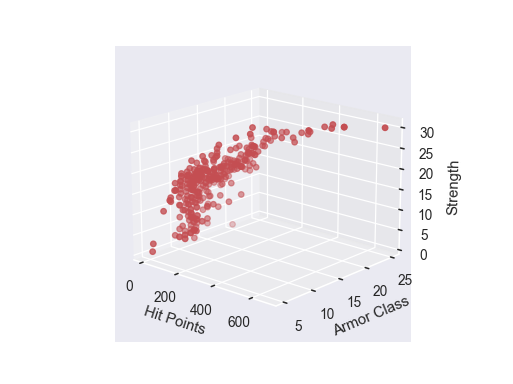

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = DF_monsters['hit_points']
y = DF_monsters['armor_class']
z = DF_monsters['strength']

ax.set_xlabel("Hit Points")
ax.set_ylabel("Armor Class")
ax.set_zlabel("Strength")

ax.scatter(x, y, z, color='r')

plt.show()

## Building and Using K-means  
Now that our data is loaded in and we can see it plotted in 3D space, it would be great to get some extra intuition about how these monsters relate to one another! Maybe my character knows that they're particularly effective against a certain monster and wants to know which monsters are most similar for greatest effect!  

**Enter: the clustering algorithms**  

With clustering algorithms, we can learn a bit about how subjects relate or can most aptly be grouped based solely on the information we have on-hand.  

One such algorithm which is both powerful and intuitive is the **K-means clustering algorithm**. The core concept behind K-means is the movement of cluster centers, or "centroids", to best describe the set of points in n-dimensional space that are closest to them. Ideally, after a series of updates and corrections, these centroids will land in space at places that best describe "clusters", or groups of data points that have the most in common.  

### Set Parameters and Initialize Centroids   
To begin, we first need to determine the number of "centroids" that we want to use in our clustering. Because clusters are centered around these centroids, this will also end up being the number of clusters you create.  

The number of centroids you set is typically referred to as "K", the term that gives the first half of the name "K-means".  

Although these centroids are not themselves monster data points, we need to be able to describe them in multidimensional space, so we give them coordinates. Fortunately for us, the K-means algorithm will move the centroids itself when it begins, so we can initialize the centroids with random coordinates and toss them out into space.  

The final parameter we'll need to set is the number of iterations we'd like the algorithm to run. Each iteration is an adjustment of the centroids' locations, and ideally the centroids will get closer to their final positions with each update.

In [5]:
#Choose the number of clusters we expect to see
k = 6

#Choose the number of dimensions
num_dimensions = 8

#Choose number of iterations
max_iterations = 100

#Randomly initialize the coordinates of our K centroids
centroids = []
for i in range(k):
    centroids.append(np.random.randint(20, size=(num_dimensions)))

centroids

[array([10, 12,  1, 14, 11,  5,  3, 10]),
 array([ 3,  4, 19,  7,  8, 18,  7,  1]),
 array([ 2,  7, 13,  9,  4, 11, 17, 17]),
 array([17,  2, 14, 14,  2, 18, 11, 17]),
 array([ 2,  1, 18, 15,  3,  7,  7,  2]),
 array([10,  2,  7, 13,  5, 14, 12, 19])]

### Function for Calculating Distance  
In order to determine the new coordinates of centroids with the "means" part of K-means, we need to know which groups of data points should be averaged for each centroid.  

In K-means, we can use distance calculations to find the corresponding cluster for each data point. There are plenty of options for performing this distance calculation, but for this workshop, we'll use the tried-and-true Euclidean distance formula. The catch here is that we need to find the distance in multi-dimensional space!

In [7]:
def euclidian_dist_8D(point1, point2):
    temp = 0
    for i in range(len(point1)-1):
        temp += (point1[i] - point2[i])**2
    distance = temp**0.5
    return(distance)

### Run K-means  
So, we've sent our centroids out into space, but we need to know how to update their locations at each iteration. We've already addressed the "K" part of K-means, so this is where the "means" part kicks in.  

At each update step, the new location of a centroid is the "mean" (or average) coordinate of all of the points in the centroid's current cluster. Simple enough!  

Here, we run the algorithm over the chosen number of iterations. At each iteration, we go through every data point and assign it to the cluster of its closest centroid. When all data points have been assigned to clusters, we are free to recalculate the coordinates of the centroids by averaging all of the coordinates in their clusters.  

Repeat this process, and at the end, the clusters will be finely-tuned and representative of similarities in the data!

In [8]:
#Run the algorithm for the chosen number of iterations
for i in range(max_iterations):
    
    #Create bins for clusters
    clusters = [[] for j in range(k)]
    
    #Assign each data point to a centroid (cluster)
    for row in range(len(DF_monsters)):
        point = []
        point.append(DF_monsters.get('strength')[row])
        point.append(DF_monsters.get('dexterity')[row])
        point.append(DF_monsters.get('constitution')[row])
        point.append(DF_monsters.get('intelligence')[row])
        point.append(DF_monsters.get('wisdom')[row])
        point.append(DF_monsters.get('charisma')[row])
        point.append(DF_monsters.get('armor_class')[row])
        point.append(DF_monsters.get('hit_points')[row])
        
        distances = []
        
        #Measure distances from the point to each centroid
        for c in range(len(centroids)):
            distances.append(euclidian_dist_8D(point,centroids[c]))
        
        #Find which centroid has the closest distance and bin the point
        cluster_ID = np.argmin(distances)
        clusters[cluster_ID].append((point,row))
    
    #Recalculate the centroids' coordinates
    new_centroids = [[0 for m in range(num_dimensions)] for j in range(k)]
    for c_ID in range(len(clusters)):
        for j in range(len(clusters[c_ID])):
            #Sum the coordinates of all data points in each centroid's cluster
            new_centroids[c_ID] = np.add(new_centroids[c_ID],clusters[c_ID][j][0])
    
    for c_ID in range(len(clusters)):
        if(len(clusters[c_ID])>0):
            #Divide the summed coordinates by the number of coordinates that were summed to get the mean
            new_centroids[c_ID] = new_centroids[c_ID] / len(clusters[c_ID])
    
#     if(np.array_equal(np.asarray(temp_centroids),np.asarray(centroids))):
#         print("Early stopping at iteration {}: No centroid change".format(i))
# #         break
#     else:
    centroids = new_centroids
        

### Analyze Results  
And that's it! You've just clustered the monsters of Dungeons & Dragons! Now we can take a look at the clusters and see what intuition we can pull from our algorithm output.  

In Dungeons & Dragons, one of the metrics used to measure monsters is Challenge Rating. One such way to explore our new clusters is to explore the Challenge Ratings of the monsters within the clusters. By measuring the average Challenge Rating and variance of the clusters, we can see if the data we've used implicitly groups monsters in a similar way to the Challenge Rating system.  

With an Average Challenge Rating vs. Variance plot, we can visualize this relationship for each cluster.

In [9]:
averages = []
variances = []
for i in range(len(clusters)):
    print("There are {} monsters in class {}".format(len(clusters[i]), i))
    temp_challenge_ratings = [0]
    for j in range(len(clusters[i])):
        temp_challenge_ratings.append(DF_monsters.get('challenge_rating')[clusters[i][j][1]])
    print("The average challenge rating is {}".format(np.average(temp_challenge_ratings)))
    print("The variance is {}\n".format(np.var(temp_challenge_ratings)))
    
    #Check for empty clusters
    if(np.average(temp_challenge_ratings)!=0.0): averages.append(np.average(temp_challenge_ratings))
    if(np.var(temp_challenge_ratings)!=0.0): variances.append(np.var(temp_challenge_ratings))

There are 102 monsters in class 0
The average challenge rating is 3.0060679611650487
The variance is 9.507093034216231

There are 61 monsters in class 1
The average challenge rating is 6.951612903225806
The variance is 19.562174817898022

There are 56 monsters in class 2
The average challenge rating is 0.19956140350877194
The variance is 0.1018967374576793

There are 35 monsters in class 3
The average challenge rating is 16.61111111111111
The variance is 34.07098765432099

There are 11 monsters in class 4
The average challenge rating is 1.09375
The variance is 1.5029296875

There are 57 monsters in class 5
The average challenge rating is 1.7198275862068966
The variance is 5.1644991082045175



<IPython.core.display.Javascript object>


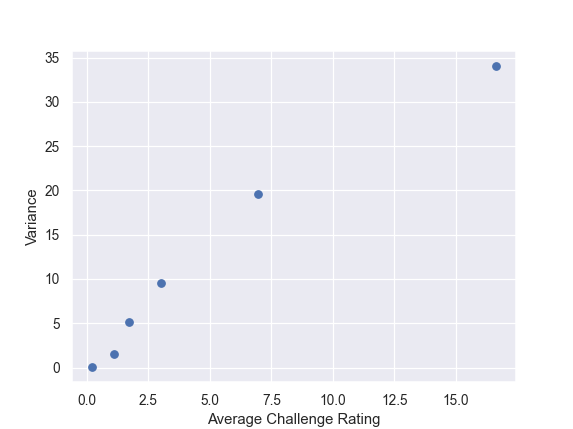

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = averages
y = variances

ax.set_xlabel("Cluster Average Challenge Rating")
ax.set_ylabel("Variance")

ax.scatter(x, y)

plt.show()

### Cluster Visualization  
All the hard work is done now, so it's time to sit back and enjoy our clusters in 3D space!  

With a different color for each of our clusters, plot each point in each cluster. Even in the context of only three of our eight dimensions, we see that the clusters are grouping our monsters as expected!

<IPython.core.display.Javascript object>


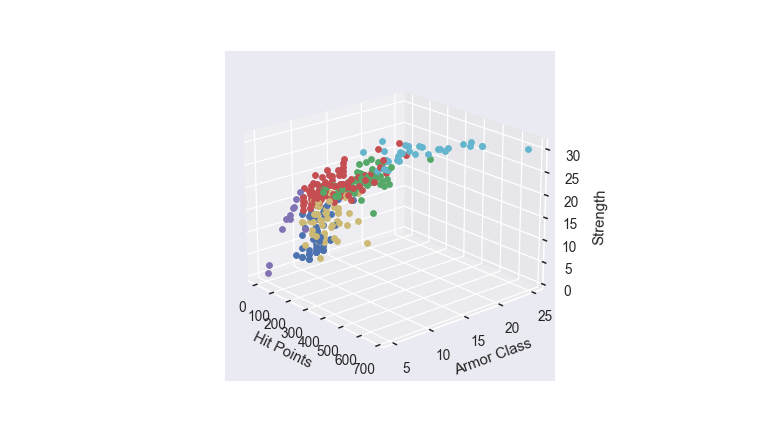

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
colors = ['r','g','b','c','m','y']
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        x = clusters[i][j][0][-1]
        y = clusters[i][j][0][-2]
        z = clusters[i][j][0][0]

        ax.scatter(x, y, z,c=colors[i])

ax.set_xlabel("Hit Points")
ax.set_ylabel("Armor Class")
ax.set_zlabel("Strength")
plt.show()